In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity, peak_signal_noise_ratio

In [2]:
import os

directory = './samples/original-image/'

file_names = os.listdir(directory)

keys = [file_name.split('.')[0] for file_name in file_names]

In [3]:
original = [plt.imread(f'./samples/original-image/{key}.jpg') for key in keys]
raw = [plt.imread(f'./samples/anydoor-output/{key}.jpg') for key in keys]
final = [plt.imread(f'./samples/final-output/{key}.jpg') for key in keys]

In [4]:
mse_raw = [mean_squared_error(img[0], img[1]) for img in zip(original, raw)]
mse_final = [mean_squared_error(img[0], img[1]) for img in zip(original, final)]

In [5]:
psnr_raw = [peak_signal_noise_ratio(img[0], img[1]) for img in zip(original, raw)]
psnr_final = [peak_signal_noise_ratio(img[0], img[1]) for img in zip(original, final)]

In [6]:
ssmi_raw = [structural_similarity(img[0], img[1], channel_axis=2) for img in zip(original, raw)]
ssmi_final = [structural_similarity(img[0], img[1], channel_axis=2) for img in zip(original, final)]

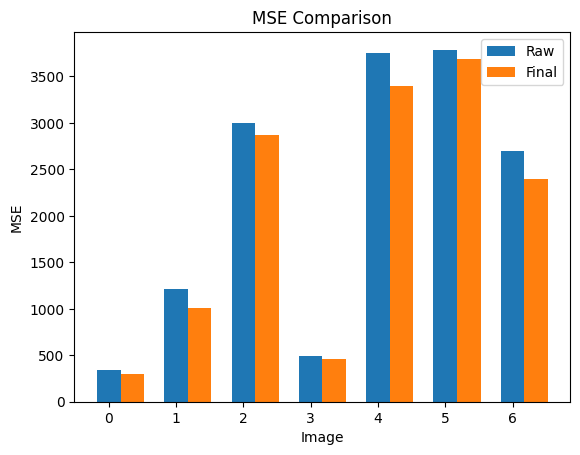

In [7]:
# Define the labels and values
labels = keys
raw_values = mse_raw
final_values = mse_final

# Set the positions of the bars
positions = range(len(labels))

# Set the width of the bars
width = 0.35

# Plot the bars
fig, ax = plt.subplots()
ax.bar(positions, raw_values, width, label='Raw')
ax.bar([p + width for p in positions], final_values, width, label='Final')

# Add labels, title, and legend
ax.set_xlabel('Image')
ax.set_ylabel('MSE')
ax.set_title('MSE Comparison')
# ax.set_xticks([p + width / 2 for p in positions])
# ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

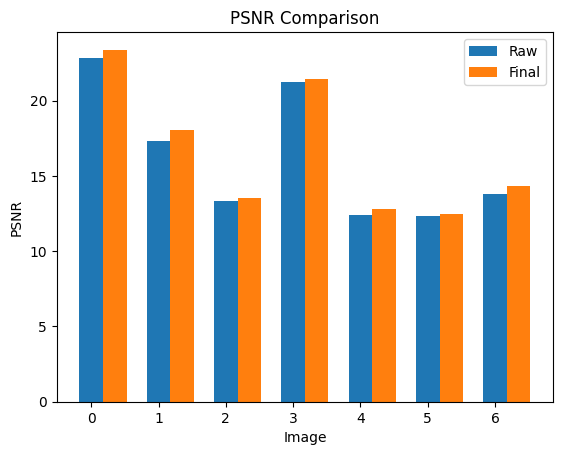

In [8]:
# Define the labels and values
labels = keys
raw_values = psnr_raw
final_values = psnr_final

# Set the positions of the bars
positions = range(len(labels))

# Set the width of the bars
width = 0.35

# Plot the bars
fig, ax = plt.subplots()
ax.bar(positions, raw_values, width, label='Raw')
ax.bar([p + width for p in positions], final_values, width, label='Final')

# Add labels, title, and legend
ax.set_xlabel('Image')
ax.set_ylabel('PSNR')
ax.set_title('PSNR Comparison')
# ax.set_xticks([p + width / 2 for p in positions])
# ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

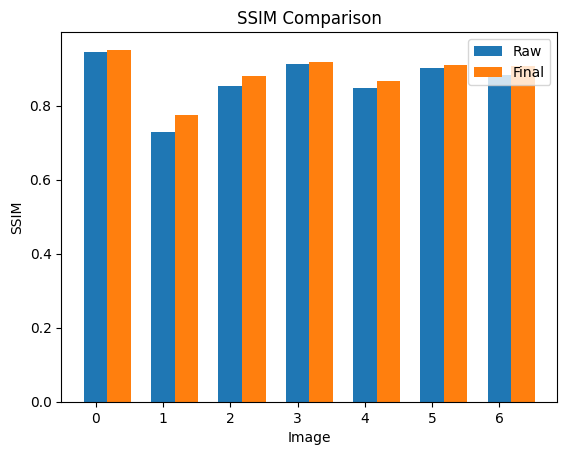

In [9]:
# Define the labels and values
labels = keys
raw_values = ssmi_raw
final_values = ssmi_final

# Set the positions of the bars
positions = range(len(labels))

# Set the width of the bars
width = 0.35

# Plot the bars
fig, ax = plt.subplots()
ax.bar(positions, raw_values, width, label='Raw')
ax.bar([p + width for p in positions], final_values, width, label='Final')

# Add labels, title, and legend
ax.set_xlabel('Image')
ax.set_ylabel('SSIM')
ax.set_title('SSIM Comparison')
# ax.set_xticks([p + width / 2 for p in positions])
# ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

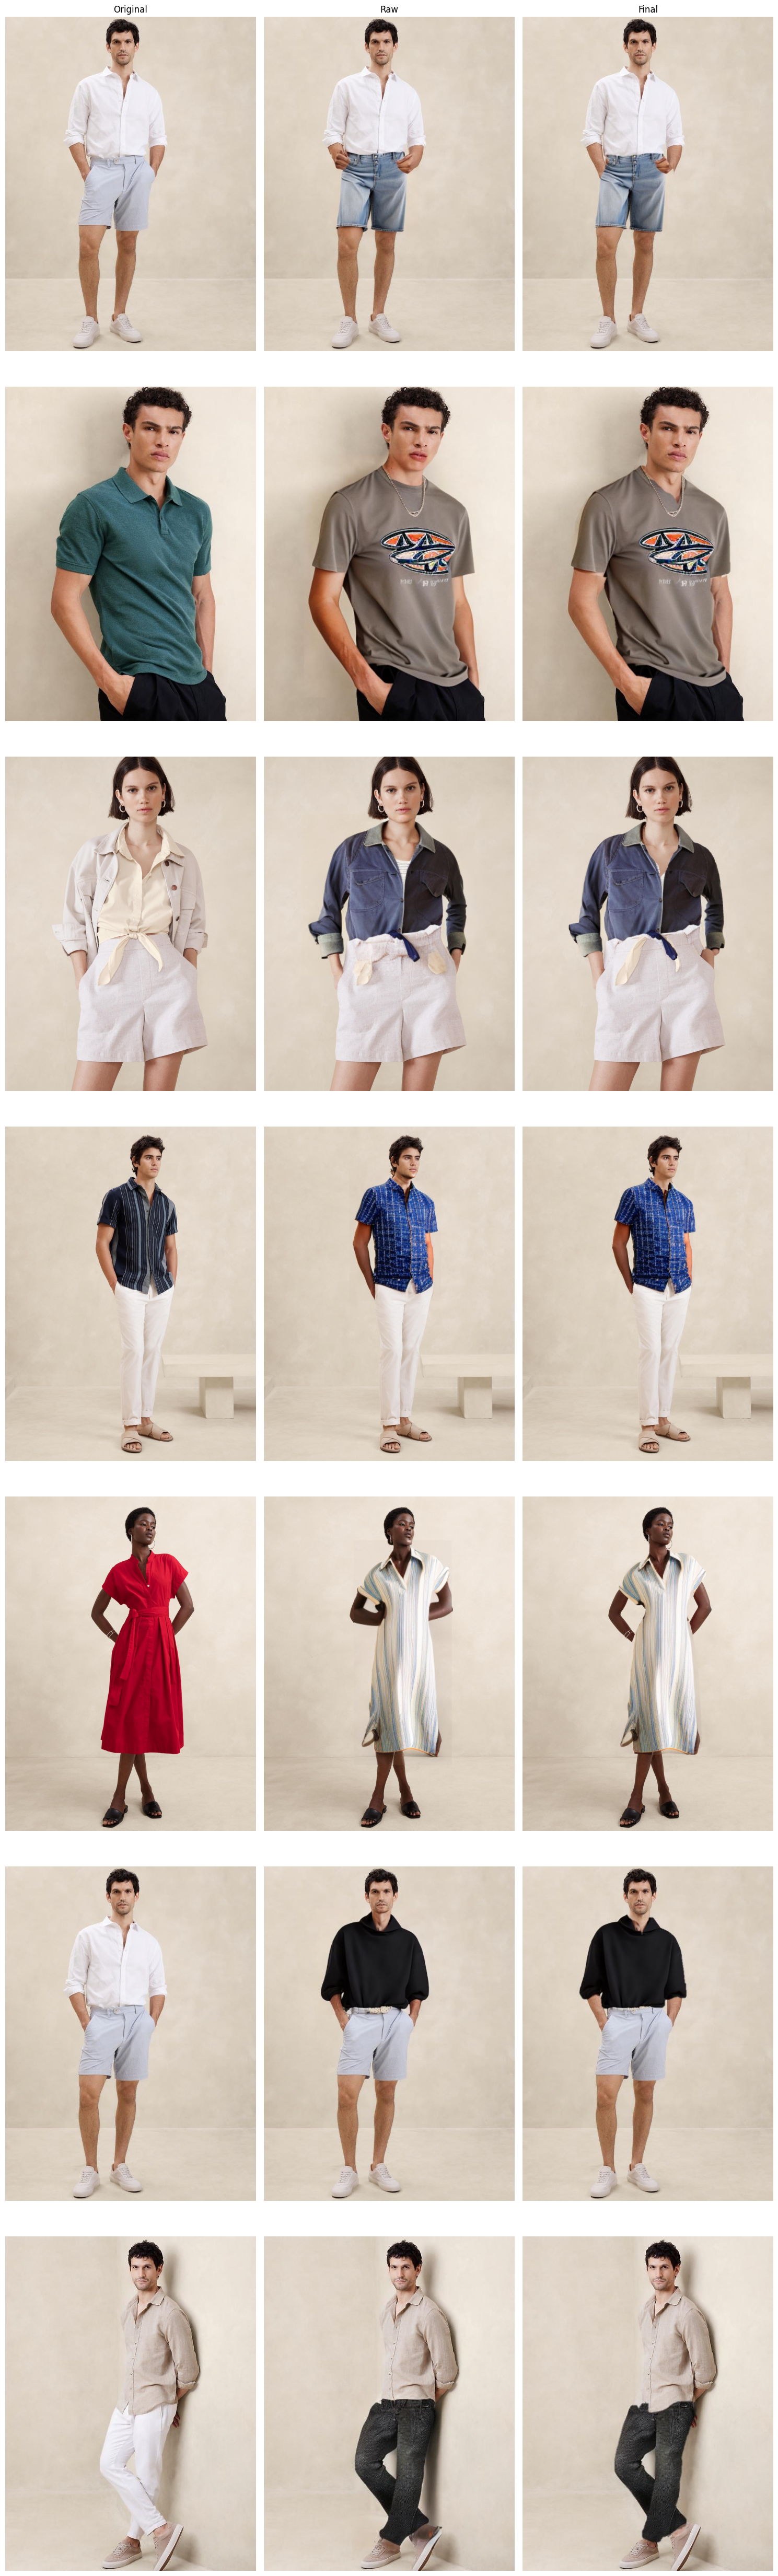

In [10]:
# Define the number of rows and columns in the grid
num_rows = len(original)
num_cols = 3

# Create a figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 50))

# Iterate over each image triplet
for i in range(num_rows):
    # Display the original image in the first column
    axes[i, 0].imshow(original[i])
    if (i == 0):
        axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')
    
    # Display the raw image in the second column
    axes[i, 1].imshow(raw[i])
    if (i == 0):
        axes[i, 1].set_title('Raw')
    axes[i, 1].axis('off')
    
    # Display the final image in the third column
    axes[i, 2].imshow(final[i])
    if (i == 0):
        axes[i, 2].set_title('Final')
    axes[i, 2].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()